<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_29/code/Astronauts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* Number of unique astronauts from each nationality
* Ratio of male to femals
* Astronauts over time
* Characteristics of selection year/mission year
  * EVA hours, total mission hours

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-14/astronauts.csv')
df.head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,mission_number,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,1960,1,1,pilot,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,1960,1,1,pilot,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,1959,1,2,pilot,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,1959,2,2,PSP,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,1959,1,1,Pilot,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0


**Find the age of each astronaut at the start of each mission.**

In [3]:
df['age_start_mission'] = df['year_of_mission'] - df['year_of_birth']
df.head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,mission_number,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,age_start_mission
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,1960,1,1,pilot,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0,27
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,1960,1,1,pilot,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0,26
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,1959,1,2,pilot,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0,41
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,1959,2,2,PSP,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0,77
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,1959,1,1,Pilot,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0,37


# Plotting

**Prepare colors and fonts.**

In [ ]:
#Palette for sex
palette = {'male':'aliceblue',
           'female':'darkorange'}

#Set the font
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
matplotlib.rc('font', family='TH Sarabun New')

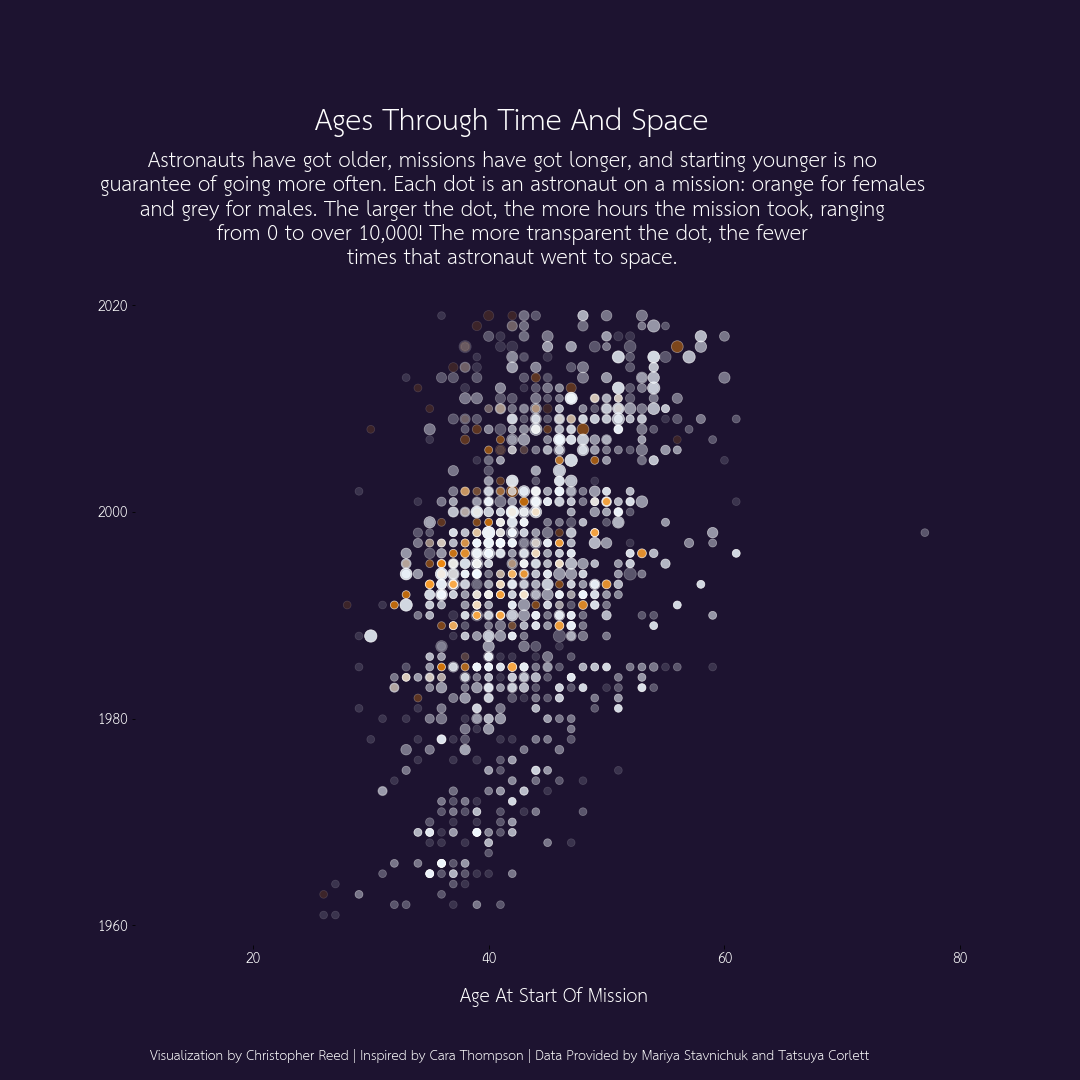

In [166]:
#Create figure
fig, ax = plt.subplots(figsize = (15,15))

#Not native way to adjust transparency. So create multiple plots to stack points with variable alpha.
for i in range(df['mission_number'].max()):
  ax = sns.scatterplot(x = 'age_start_mission', y = 'year_of_mission', data = df[df['total_number_of_missions'] == i], size = 'total_hrs_sum', sizes = (60,150), hue = 'sex', palette = palette, alpha = (1/7)*i, legend = False)

##################
#AXES FORMATTING##
##################

#Remove axis lines
for i in ['right', 'top', 'bottom', 'left']:
    ax.spines[i].set_visible(False)


#Remove ticks
ax.set_xticks([20, 40, 60, 80])
ax.set_xticklabels(['20', '40', '60', '80'], color = 'white', size = 14)

ax.set_yticks([1960, 1980, 2000, 2020])
ax.set_yticklabels(['1960', '1980', '2000', '2020'], color = 'white', size = 14)

#Axis labels
ax.set_xlabel('Age At Start Of Mission', color = 'white', size = 18, labelpad = 20)
ax.set_ylabel('')

#Axis limits
ax.set_xlim(left = 10, right = 81)
ax.set_ylim(top = 2037)

#Change background color
ax.patch.set_facecolor('#1d1330')
fig.patch.set_facecolor('#1d1330')

#################
#TEXT FORMATTING#
#################

#Text
ax.text(42,2037,'Ages Through Time And Space', 
        color = 'white', 
        size = 28,
        weight = 'bold',
        horizontalalignment = 'center')

ax.text(42, 2024, 'Astronauts have got older, missions have got longer, and starting younger is no\nguarantee of going more often. Each dot is an astronaut on a mission: orange for females\nand grey for males. The larger the dot, the more hours the mission took, ranging\nfrom 0 to over 10,000! The more transparent the dot, the fewer\ntimes that astronaut went to space.',
        color = 'white',
        size = 20,
        horizontalalignment = 'center')

ax.text(42, 1947, 'Visualization by Christopher Reed | Inspired by Cara Thompson | Data Provided by Mariya Stavnichuk and Tatsuya Corlett ',
        color = 'white',
        horizontalalignment = 'center',
        size = 13)

#Save
plt.savefig('astronauts.png', bbox_inches = 'tight')